In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
#upload file
url = "https://raw.githubusercontent.com/Kina03/ProjectIs/refs/heads/main/Global%20Peace%20Index%202023.csv"
df = pd.read_csv(url)
df.head()

,Country,iso3c,year,Overall Scores,Safety and Security,Ongoing Conflict,Militarian
0,Afghanistan,AFG,2008,3.104,3.372,3.153,2.594
1,Angola,AGO,2008,1.991,2.395,1.655,1.744
2,Albania,ALB,2008,1.791,2.236,1.247,1.776
3,United Arab Emirates,ARE,2008,1.651,1.875,1.000,2.218
4,Argentina,ARG,2008,1.820,2.371,1.403,1.398


In [5]:
#check missing value
print("Missing values : \n",df.isnull().sum())

Missing values : 
 Country                 0
iso3c                   0
year                    0
Overall Scores         12
Safety and Security     0
Ongoing Conflict        0
Militarian              0
dtype: int64


In [6]:
#processing

df['Overall Scores'].fillna(df['Overall Scores'].mean(), inplace=True)

data = df[['Overall Scores', 'Safety and Security', 'Ongoing Conflict', 'Militarian']].copy()

#level and create new column for classification
data['Score Category'] = pd.qcut(data['Overall Scores'], q = 3,labels=['Low','Medium','High'])


#transform label to num
label = LabelEncoder()
data['Score Category'] = label.fit_transform(data['Score Category'])

#feature
X = data[['Safety and Security','Ongoing Conflict']]
y = data['Score Category']

#train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for classification
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_test)

#Standardization for Clustering
scale = StandardScaler()
data_scale = scale.fit_transform(data[['Safety and Security','Ongoing Conflict','Militarian']])

data.head()



<ipython-input-6-aa3405fa0331>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Overall Scores'].fillna(df['Overall Scores'].mean(), inplace=True)


,Overall Scores,Safety and Security,Ongoing Conflict,Militarian,Score Category
0,3.104,3.372,3.153,2.594,0
1,1.991,2.395,1.655,1.744,2
2,1.791,2.236,1.247,1.776,1
3,1.651,1.875,1.000,2.218,1
4,1.820,2.371,1.403,1.398,1


In [7]:
# Model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print("KNN : ")

print(classification_report(y_test,y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN : 
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       174
           1       0.91      0.94      0.92       174
           2       0.83      0.84      0.83       174

    accuracy                           0.89       522
   macro avg       0.89      0.89      0.89       522
weighted avg       0.89      0.89      0.89       522

Confusion Matrix:
[[155   0  19]
 [  0 163  11]
 [ 11  17 146]]


In [8]:
# Model SVM
svm = SVC(kernel='rbf', random_state = 42, probability=True)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

print("SVM : ")
print(classification_report(y_test,y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))



SVM : 
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       174
           1       0.90      0.91      0.91       174
           2       0.83      0.87      0.85       174

    accuracy                           0.90       522
   macro avg       0.90      0.90      0.90       522
weighted avg       0.90      0.90      0.90       522

Confusion Matrix:
[[157   0  17]
 [  0 159  15]
 [  5  17 152]]


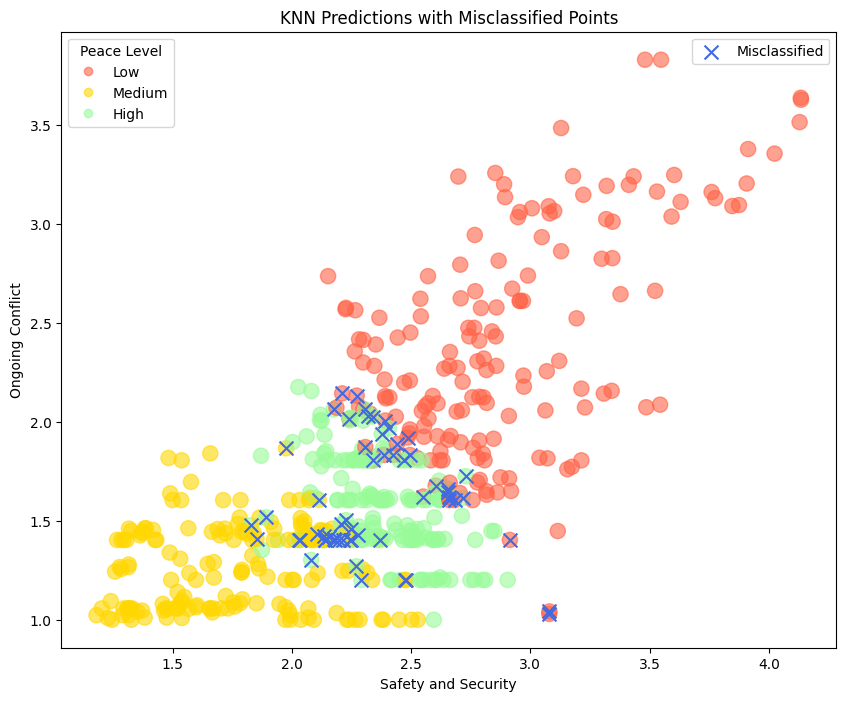

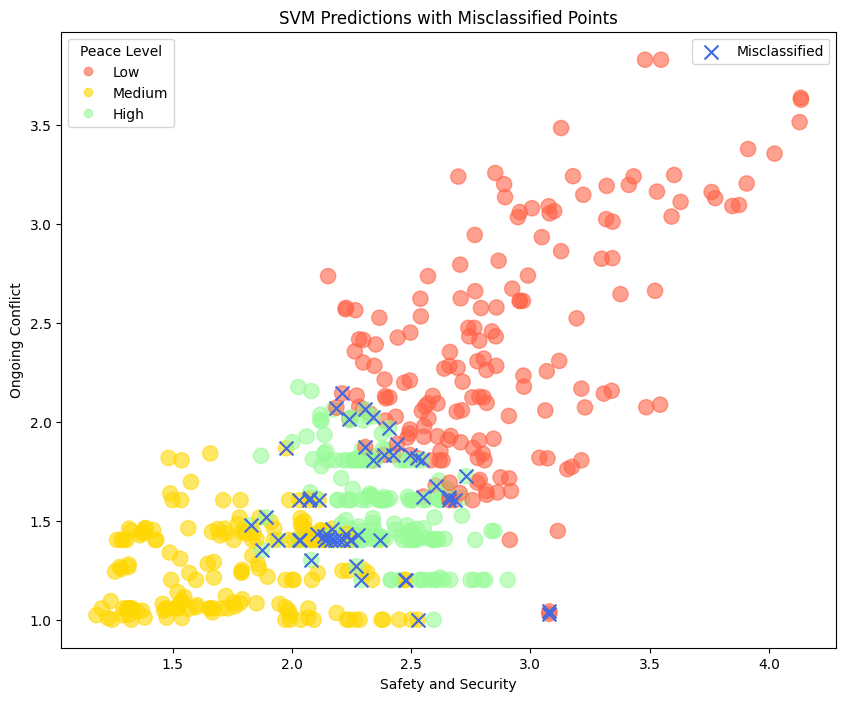

In [11]:
#Scatter Plot

models = {
    'KNN' : (knn,y_pred_knn),
    'SVM' : (svm,y_pred_svm)
}


for model_name, (model, y_pred) in models.items():
  plt.figure(figsize=(10,8))
  cmap = ListedColormap(['Tomato', 'Gold','PaleGreen'])
  scatter = plt.scatter(X_test['Safety and Security'],X_test['Ongoing Conflict'],
                        c=y_test,cmap=cmap,alpha=0.6,s=120)

  incorrect = np.where(y_pred != y_test)[0]
  plt.scatter(X_test.iloc[incorrect]['Safety and Security'],
              X_test.iloc[incorrect]['Ongoing Conflict'],
              marker='x', color='RoyalBlue', label='Misclassified', s=100)

  plt.title(f'{model_name} Predictions with Misclassified Points')
  plt.xlabel('Safety and Security')
  plt.ylabel('Ongoing Conflict')

  legend_elements = scatter.legend_elements()
  legend1 = plt.legend(handles=legend_elements[0], labels=['Low', 'Medium', 'High'],
                      loc="upper left", title="Peace Level")
  plt.gca().add_artist(legend1)
  plt.legend(loc="upper right")
  plt.show()

In [12]:
outlier_points = df[(df['Safety and Security'] < 0.5) & (df['Ongoing Conflict'] < 0.5)]
print(outlier_points)


          Country iso3c  year  Overall Scores  Safety and Security  \
122     Palestine   PSE  2008        2.017775                  0.0   
135   South Sudan   SSD  2008        2.017775                  0.0   
285     Palestine   PSE  2009        2.017775                  0.0   
298   South Sudan   SSD  2009        2.017775                  0.0   
448     Palestine   PSE  2010        2.017775                  0.0   
461   South Sudan   SSD  2010        2.017775                  0.0   
611     Palestine   PSE  2011        2.017775                  0.0   
624   South Sudan   SSD  2011        2.017775                  0.0   
774     Palestine   PSE  2012        2.017775                  0.0   
937     Palestine   PSE  2013        2.017775                  0.0   
1100    Palestine   PSE  2014        2.017775                  0.0   
1263    Palestine   PSE  2015        2.017775                  0.0   

      Ongoing Conflict  Militarian  
122                0.0         0.0  
135            

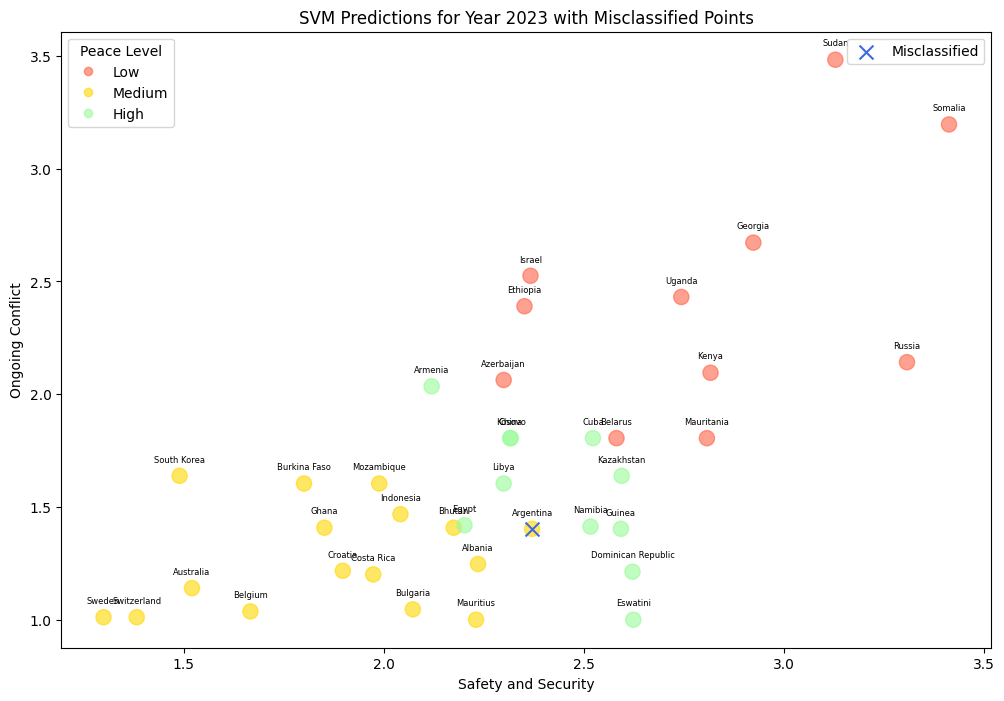

In [ ]:
#ลองเลือกให้แสดงเฉพาะปี

# เพิ่มคอลัมน์ปีเข้าไปใน data
df['year'] = df['year']

# แบ่งระดับ Overall Scores เป็น 3 กลุ่ม (Low, Medium, High) สำหรับ Classification
df['Score Category'] = pd.qcut(df['Overall Scores'], q=3, labels=['Low', 'Medium', 'High'])

# แปลง Label เป็นตัวเลข
label_encoder = LabelEncoder()
df['Score Category'] = label_encoder.fit_transform(df['Score Category'])

# แบ่ง Train-Test โดยไม่รวม year เป็น feature
X = df[['Safety and Security', 'Ongoing Conflict']]
y = df['Score Category']
years = df['year']  # ดึงปีมาใช้ตอนแบ่งข้อมูล
countries = df['Country'] # ดึงชื่อประเทศ

X_train, X_test, y_train, y_test, year_train, year_test, country_train, country_test = train_test_split(
    X, y, years, countries, test_size=0.2, random_state=42, stratify=y
)

# กรองเฉพาะปี 2023
X_test_2023 = X_test[year_test == 2008]
y_test_2023 = y_test[year_test == 2008]
country_test_2023 = country_test[year_test == 2008]

# สร้างและฝึกโมเดล SVM
svm = SVC()
svm.fit(X_train, y_train)

# ทำนายผลลัพธ์ใหม่จากโมเดล SVM
y_pred_2023 = svm.predict(X_test_2023)

# สร้าง Scatter Plot สำหรับปี 2023
plt.figure(figsize=(12, 8))
cmap = ListedColormap(['Tomato', 'Gold', 'PaleGreen'])
scatter = plt.scatter(X_test_2023['Safety and Security'], X_test_2023['Ongoing Conflict'],
                    c=y_test_2023, cmap=cmap, alpha=0.6,s=120)

# แสดงจุดที่ทำนายผิด
incorrect = np.where(y_pred_2023 != y_test_2023)[0]
plt.scatter(X_test_2023.iloc[incorrect]['Safety and Security'],
            X_test_2023.iloc[incorrect]['Ongoing Conflict'],
            marker='x', color='RoyalBlue', label='Misclassified',s=100)

# เพิ่มชื่อประเทศในแต่ละจุด
for i, country in enumerate(country_test_2023):
    plt.annotate(country, (X_test_2023.iloc[i]['Safety and Security'], X_test_2023.iloc[i]['Ongoing Conflict']),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center', fontsize=6)

plt.title('SVM Predictions for Year 2023 with Misclassified Points')
plt.xlabel('Safety and Security')
plt.ylabel('Ongoing Conflict')

# สร้าง Legend
legend_elements = scatter.legend_elements()
legend1 = plt.legend(handles=legend_elements[0], labels=['Low', 'Medium', 'High'],
                    loc="upper left", title="Peace Level")
plt.gca().add_artist(legend1)
plt.legend(loc="upper right")
plt.show()

In [ ]:
#KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/Kina03/ProjectIs/refs/heads/main/Global%20Peace%20Index%202023.csv"
df = pd.read_csv(url)

In [ ]:
#ลือกเฉพาะคอลัมน์ที่ใช้จัดกลุ่ม
features = ["Overall Scores", "Safety and Security", "Ongoing Conflict", "Militarian"]
df_cluster = df[features].copy()

#ลบแถวที่มีค่า NaN ใน Overall Scores
df_clean = df.dropna(subset=["Overall Scores"]).copy()

#ทำการ Standardize ข้อมูลให้อยู่ในช่วงเดียวกัน
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_clean[features])

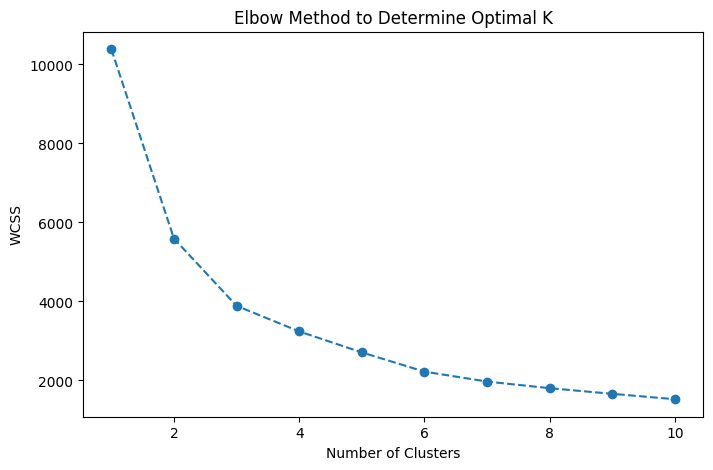

In [16]:
#ใช้ Elbow Method เพื่อหาจำนวน Cluster ที่เหมาะสม
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)  # ทดสอบตั้งแต่ 1 ถึง 10 คลัสเตอร์
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

#แสดงกราฟ Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [19]:
#ใช้ K-Means แบ่งเป็น 3 กลุ่ม
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean["Cluster"] = kmeans.fit_predict(df_cluster_scaled)

cluster_order = df_clean.groupby("Cluster")["Overall Scores"].mean().sort_values().index.tolist()
cluster_labels = {
        cluster_order[0]: "Highly Peaceful",  #สงบมาก
        cluster_order[1]: "Moderately Peaceful",
        cluster_order[2]: "High Conflict"  #ความขัดแย้งมาก
    }

df_clean["Cluster Label"] = df_clean["Cluster"].map(cluster_labels)
cluster_colors = {
      "Highly Peaceful": 'PaleGreen',
      "Moderately Peaceful": 'Gold',
      "High Conflict": 'Tomato'}

#ดูจำนวนประเทศในแต่ละกลุ่ม
print("Number of countries in each cluster:\n", df_clean["Cluster Label"].value_counts())


Number of countries in each cluster:
 Cluster Label
Moderately Peaceful    1345
Highly Peaceful         871
High Conflict           380
Name: count, dtype: int64


In [20]:
#คำนวณค่าเฉลี่ยของแต่ละกลุ่มเพื่อวิเคราะห์ความแตกต่าง
cluster_means = df_clean.groupby("Cluster Label")[features].mean()
print("\nCluster Means:\n", cluster_means)


Cluster Means:
                      Overall Scores  Safety and Security  Ongoing Conflict  \
Cluster Label                                                                
High Conflict              2.813666             3.121924          2.760279   
Highly Peaceful            1.574985             1.766373          1.255696   
Moderately Peaceful        2.079658             2.498557          1.715900   

                     Militarian  
Cluster Label                    
High Conflict          2.396855  
Highly Peaceful        1.693749  
Moderately Peaceful    1.877679  


In [21]:
#แสดงประเทศที่อยู่ในแต่ละกลุ่ม
for label in cluster_labels.values():
    print(f"\nCountries in Cluster {label}:")
    print(df_clean[df_clean["Cluster Label"] == label]["Country"].tolist())



Countries in Cluster Highly Peaceful:
['Albania', 'United Arab Emirates', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Burkina Faso', 'Bulgaria', 'Bosnia and Herzegovina', 'Bhutan', 'Botswana', 'Canada', 'Switzerland', 'Chile', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom', 'Ghana', 'Croatia', 'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Italy', 'Jordan', 'Japan', 'South Korea', 'Kuwait', 'Lithuania', 'Latvia', 'Madagascar', 'Mozambique', 'Mauritius', 'Malawi', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Oman', 'Panama', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Singapore', 'Sierra Leone', 'Slovakia', 'Slovenia', 'Sweden', 'Tunisia', 'Taiwan', 'Tanzania', 'Uruguay', 'Vietnam', 'Albania', 'United Arab Emirates', 'Australia', 'Austria', 'Belgium', 'Burkina Faso', 'Bulgaria', 'Bosnia and Herzegovina', 'Bhutan', 'Botswana', 'Canada', 'Switzerland', 'Chile', 'Costa Rica', 'Cyprus', 'Czech Republic',

ข้อมูลโดยรวม :


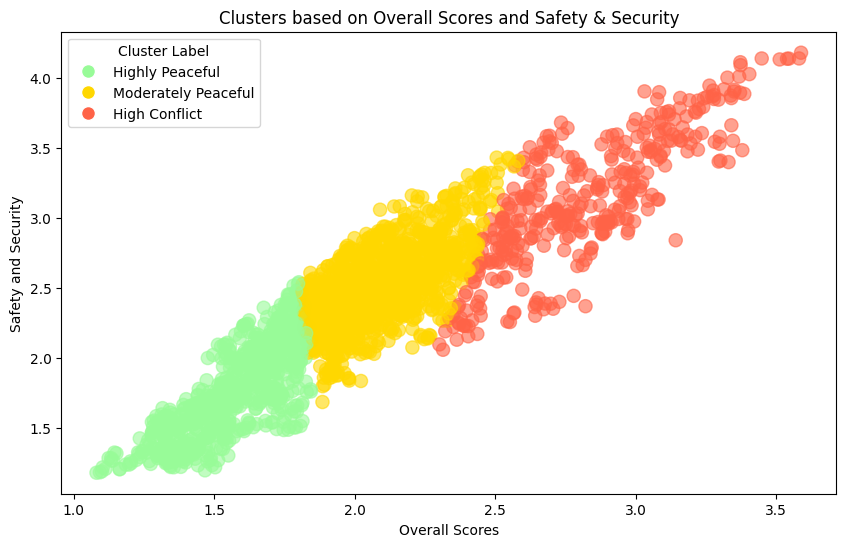

In [26]:
cmap = ListedColormap([
    cluster_colors[cluster_labels[cluster_order[0]]],
    cluster_colors[cluster_labels[cluster_order[1]]],
    cluster_colors[cluster_labels[cluster_order[2]]]
])

# วาด Scatter Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_clean["Overall Scores"],
                      df_clean["Safety and Security"],
                      c=df_clean["Cluster"].map(lambda x: cluster_order.index(x)),
                      cmap=cmap, alpha=0.6, s=90)

print("ข้อมูลโดยรวม :")
plt.title("Clusters based on Overall Scores and Safety & Security")
plt.xlabel("Overall Scores")
plt.ylabel("Safety and Security")

# ✅ กำหนด Labels ใหม่
cluster_names = ["Highly Peaceful", "Moderately Peaceful", "High Conflict"]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10)
           for i in range(len(cluster_names))]

plt.legend(handles, cluster_names, title="Cluster Label")
plt.show()